<a href="https://colab.research.google.com/github/PrashantShinagare/EVA5/blob/master/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils

# DATA TRANSFORM (TO TENSOR and OTHER)

In [2]:
data_transforms = transforms.Compose([transforms.ToTensor()])

# LOAD DATASET

In [3]:
train = datasets.MNIST('./', train=True, download=True,transform=data_transforms)
test = datasets.MNIST('./', train=False, download=True, transform=data_transforms)

# X = datasets.load_boston(return_X_y=True)
# transforms.ToTensor(train)
# print(y)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


# DATA ARGUMENTS LOADER

In [4]:
batch_size = 64

cuda = torch.cuda.is_available()
# if cuda:
#   torch.cuda.manual_seed(3)

# dataloader arguments
dataloader_args = dict(shuffle = True, batch_size = batch_size, num_workers = 4,pin_memory = True) if cuda else dict(shuffle = True, batch_size = 64)

train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

# Data Stats and Sample DATA

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Train
 - Numpy Shape :  (60000, 28, 28)
 - Tensor Shape :  torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1305)
 - std: tensor(0.3081)
 - var: tensor(0.0949)

torch.Size([64, 1, 28, 28])
torch.Size([64])


tensor([3, 3, 8, 9, 6, 9, 0, 8, 8, 7, 7, 9, 0, 6, 1, 1, 5, 3, 0, 8, 1, 5, 7, 8,
        0, 1, 0, 8, 1, 6, 7, 9, 6, 4, 6, 2, 4, 4, 7, 3, 7, 1, 6, 2, 8, 4, 5, 6,
        6, 9, 5, 4, 1, 9, 6, 3, 5, 8, 7, 2, 4, 0, 2, 2])


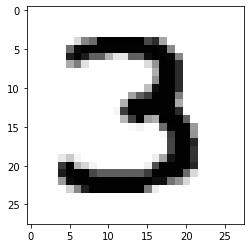

In [5]:
# Converting Tensor to numpy for the stats and plotting

train_data = train.train_data
n=len(train_data)
train_data = train.transform(train.train_data.numpy())
p=len(train_data)
# print(n)
# print(p)

print("Train")
print(" - Numpy Shape : ", train.train_data.numpy().shape)
print(" - Tensor Shape : ", train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)               # Has train data and arguments such as batch size, shuffle, worker, pin_memory
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Visualize some of the images

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[1].numpy().squeeze(), cmap='gray_r')   # Removes one dimension from the existing dimension Eg: 3 dimension to 2D and 2 dimensional to 1D
# plt.imshow(images[1].numpy().squeeze(), )
print(labels)

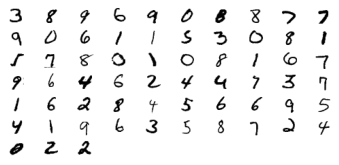

In [6]:
#figure = plt.figure()
num_of_images = 63
for index in range (1, num_of_images+1):
  plt.subplot(10, 10, index)
  plt.axis("off")
  plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')


# BASIC MODEL

In [24]:
droupout_value = 0.03

class Net (nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    #Input Block
    self.convblock1 = nn.sequential(
        nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), bias=False),
        nn.BatchNorm2d(8),
        nn.ReLU(),
        nn.Dropout(droupout_value)
    ) # input_size = 28 output_size = 26 receptive_field = 3

    self.convblock2 = nn.sequential(
        nn.Conv2d(in_channels=8, out_channels=10, kernel_size=(3,3), bias=False),
        nn.BatchNorm2d(10),
        nn.ReLU(),
        nn.Dropout(droupout_value)
    ) # input_size = 26 output_size = 24 receptive_field = 5

    self.convblock3 = nn.sequential(
        nn.Conv2d(in_channels=8, out_channels=10, kernel_size=(3,3), bias=False),
        nn.BatchNorm2d(10),
        nn.ReLU(),
        nn.Dropout(droupout_value)
    ) # input_size = 24 output_size = 22 receptive_field = 7

    # Transition Block
    self.pool1 = nn.MaxPool2d(2,2) # input_size = 22 output_size = 11 receptive_field = 

    self.convblock4 = nn.sequential(
        nn.conv2d(in_channels=10, out_channels=20, kernel_size=(3,3), biaz=False)
        nn.BatchNorm2d(20)
        nn.ReLU()
        nn.Dropout(droupout_value)
    ) # input_size = 11 output_size = 11 receptive_field = 

    self.convblock5 = nn.sequential(
        nn.conv2d(in_channels=20, out_channels=20, kernel_size=(3,3), biaz=False)
        nn.BatchNorm2d(20)
        nn.ReLU()
        nn.Dropout(droupout_value)
    ) # input_size = 11 output_size = 9 receptive_field = 

    self.convblock6 = nn.sequential(
        nn.conv2d(in_channels=20, out_channels=10, kernel_size=(3,3), biaz=False)
        nn.BatchNorm2d(20)
        nn.ReLU()
        nn.Dropout(droupout_value)
    ) # input_size = 9 output_size = 7 receptive_field = 

    self.convblock7 = nn.sequential(
        nn.conv2d(in_channels=10, out_channels=10, kernel_size=(5,5), biaz=False)
        nn.BatchNorm2d(20)
        nn.ReLU()
        nn.Dropout(droupout_value)
    )   # input_size = 7 output_size = 5 receptive_field = 3

    self.convblock8 = nn.sequential(
        nn.conv2d(in_channels=10, out_channels=10, kernel_size=(5,5), biaz=False)
        nn.BatchNorm2d(20)
        nn.ReLU()
        nn.Dropout(droupout_value)
    )   # input_size = 5 output_size = 1 receptive_field = 3


    def forward (self, x):
      x = self.convblock1(x)
      x = self.convblock2(x)
      x = self.convblock3(x)
      x = self.self.pool1(x)
      x = self.convblock4(x)
      x = self.convblock5(x)
      x = self.convblock6(x)
      x = self.convblock7(x)
      x = self.convblock8(x)
      
    





# KEEP IT CLOSED

In [ ]:
from sklearn import datasets 
boston = datasets.load_boston()

X = boston.data
# len(X)
# print(X)
y = boston.target
# len(y)
# print(y)

In [ ]:
# X= {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
# y= {0, 0, 0, 1, 0, 1, 1, 0, 0, 1}

Dataset = CustomDataset(torch.FloatTensor(X), torch.FloatTensor(y))

class customdataset(Dataset):

  def __init__ (self, X_data, y_data):
    self.X_data = X_data
    self,y_data = y_data

  def __getitem__ (self, index):
    return self.X_data[index], self.y_data[index]

  def __len__ (self):
    return(len(self.X_data))




In [ ]:
m = nn.LogSoftmax()
input = torch.ones(2, 3)
print(input)
output = F.log_softmax(input, dim=1)
print(output)
output_1 = F.log_softmax(input, dim=0)
print(output_1)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[-1.0986, -1.0986, -1.0986],
        [-1.0986, -1.0986, -1.0986]])
tensor([[-0.6931, -0.6931, -0.6931],
        [-0.6931, -0.6931, -0.6931]])


In [ ]:
from tqdm import tqdm 

for i in tqdm(range(int(9e6))): 
	pass


100%|██████████| 9000000/9000000 [00:02<00:00, 4272921.00it/s]
